In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
os.chdir("D:/NUS/")
#os.getcwd()

In [3]:
data = pd.read_csv("./GitHub/BT4222_GrpProject/Output/TJ_dataset_clean2.csv")
data = data.drop(data.columns[0],axis=1)
data.head()

,country,fx_rate,goal,pledged,spotlight,staff_pick,state,usd_type,story,faq,num_faq,comments,n_comments,duration,parent_category,category_name,month_launched,year_launched,title_blurb,language
0,ES,1.212886,15000,1.0,False,False,0,domestic,Final Hi ! The funds we will used to pay a pai...,[' '],0,No yet .,0.0,30,Technology,3D Printing,6,2016,Save water 100 % liquid in at home . With your...,en
1,NZ,0.723585,5000,15.0,False,False,0,domestic,At Primary School we are looking at a communit...,[' '],0,No yet .,0.0,30,Food,Farms,8,2015,Primary Community Garden . We at Primary are l...,en
2,US,1.000000,10000,0.0,False,False,0,domestic,Hello world :-] My name is . I have been with ...,[' '],0,No yet .,0.0,29,Art,Mixed Media,4,2015,"Aspiring in need of better , and .. Self - tau...",en
3,US,1.000000,2000,0.0,False,False,0,domestic,"I ' m tired of woman being and considered "" ov...",[' '],0,No yet .,0.0,30,Photography,People,9,2014,Beauty At Any Age . So many believe they are p...,en
4,US,1.000000,2500,340.0,False,False,0,international,Table of Contents • TAPEWORM by Martin Rose • ...,[' '],0,"over 6 ago So sorry your goal ' t met , but I ...",1.0,30,Publishing,Anthologies,11,2014,and from the Horror . The Horror ' s Rector us...,en


In [4]:
data.columns

Index(['country', 'fx_rate', 'goal', 'pledged', 'spotlight', 'staff_pick',
       'state', 'usd_type', 'story', 'faq', 'num_faq', 'comments',
       'n_comments', 'duration', 'parent_category', 'category_name',
       'month_launched', 'year_launched', 'title_blurb', 'language'],
      dtype='object')

In [5]:
data.isna().sum()

country             0
fx_rate             0
goal                0
pledged             0
spotlight           0
staff_pick          0
state               0
usd_type            0
story              10
faq                 0
num_faq             0
comments            0
n_comments          0
duration            0
parent_category     0
category_name       0
month_launched      0
year_launched       0
title_blurb         0
language            0
dtype: int64

In [14]:
#fill na with na
data = data.fillna("na")

## Create a dataset for text and sentiment analysis

In [15]:
data_text = data[["title_blurb","comments","story","faq","state"]]

In [16]:
data_text.sample(5)

,title_blurb,comments,story,faq,state
393,' s Party Central . Starting a ' s Party Hub s...,No yet .,The will be for with Child - Based : pay to ad...,[' '],0
564,3100 Run and Become . A New Film on Running + ...,Fletcher almost 4 ago The that are coming thro...,"Update : We all did it ! So , can we use more ...",[' Are you being funded by ? While we love man...,1
272,. I ' m a virtual reality experience which wil...,R . P . about 4 ago ! . All the very best ! ab...,PLAY Virtual reality is finally as an accessib...,[' '],1
897,& Take to the Streets . & take to the streets ...,No yet .,’ s Vain Combat and The Snake have been anonym...,[' '],1
6,"Softly , With Teeth : A Vampire + Visual Novel...",about 1 month ago It ' s been an incredibly ye...,*** Note : If you ' re physical goods to the d...,[' '],1


In [17]:
data_text.isna().sum()

title_blurb    0
comments       0
story          0
faq            0
state          0
dtype: int64

### Feature engineering 1: Combine name and blurb

In [11]:
data_text[["title_blurb"]] = data_text[["name", "blurb"]].fillna("na").agg(".".join, axis=1)

In [12]:
data_text = data_text.drop(["name","blurb"],axis=1)
data_text.head()

,comments,story,faq,state,title_blurb
0,Only backers can post comments. Log in\nNo com...,Producto Final\nHi! The funds we will used to ...,[' '],failed,Save water 100% liquid downloads in toilets at...
1,Only backers can post comments. Log in\nNo com...,At Ormiston Primary School we are looking at c...,[' '],failed,Ormiston Primary Community Garden.We at Ormist...
2,Only backers can post comments. Log in\nNo com...,Hello world :-] My name is Bryan. I have been ...,[' '],failed,"Aspiring metalsmith in need of better tools, a..."
3,Only backers can post comments. Log in\nNo com...,I'm tired of woman being overlooked and consid...,[' '],failed,Beauty At Any Age.So many women believe they a...
4,Only backers can post comments. Log in\nPaula ...,Table of Contents\n• TAPEWORM by Martin Rose\n...,[' '],failed,Shrieks and Shivers from the Horror Zine.The H...


In [13]:
data_text["title_blurb"][0]

'Save water 100% liquid downloads in toilets at home.With your help we will create this device that saves water in toilets.\nDispositivo que ahorra 100% agua.'

### Clean comments

In [14]:
data_text["comments_clean"] = data_text['comments'].map(lambda x: x.replace('Only backers can post comments. Log in\n'," "))

In [15]:
data_text[["comments_clean"]].head(10)

,comments_clean
0,No comments yet.
1,No comments yet.
2,No comments yet.
3,No comments yet.
4,Paula Limbaugh\nover 6 years ago\nSo sorry yo...
5,No comments yet.
6,finnibun\nabout 1 month ago\nIt's been an inc...
7,PageLessCreator\n7 months ago\nPageLess just ...
8,Alexander DruninSuperbacker\n11 months ago\nC...
9,No comments yet.


In [16]:
data_text["comments_clean"] = data_text['comments_clean'].map(lambda x: x.replace('\n',". "))
data_text[["comments_clean"]].head(10)

,comments_clean
0,No comments yet.
1,No comments yet.
2,No comments yet.
3,No comments yet.
4,Paula Limbaugh. over 6 years ago. So sorry yo...
5,No comments yet.
6,finnibun. about 1 month ago. It's been an inc...
7,PageLessCreator. 7 months ago. PageLess just ...
8,Alexander DruninSuperbacker. 11 months ago. C...
9,No comments yet.


In [17]:
data_text = data_text.drop(["comments"], axis=1)
data_text.head()

,story,faq,state,title_blurb,comments_clean
0,Producto Final\nHi! The funds we will used to ...,[' '],failed,Save water 100% liquid downloads in toilets at...,No comments yet.
1,At Ormiston Primary School we are looking at c...,[' '],failed,Ormiston Primary Community Garden.We at Ormist...,No comments yet.
2,Hello world :-] My name is Bryan. I have been ...,[' '],failed,"Aspiring metalsmith in need of better tools, a...",No comments yet.
3,I'm tired of woman being overlooked and consid...,[' '],failed,Beauty At Any Age.So many women believe they a...,No comments yet.
4,Table of Contents\n• TAPEWORM by Martin Rose\n...,[' '],failed,Shrieks and Shivers from the Horror Zine.The H...,Paula Limbaugh. over 6 years ago. So sorry yo...


### Clean FAQ

In [18]:
data_text["faq"][1]

"['   ']"

In [19]:
data_text["faq_clean"] = data_text['faq'].map(lambda x: x.replace("['   ']","No faq"))

In [20]:
data_text["faq_clean"] = data_text['faq_clean'].map(lambda x: x if x.find("No faq") == 0 else x[2:-2])

In [21]:
data_text[["faq_clean"]][10:20]

,faq_clean
10,No faq
11,No faq
12,What happens to my pledge if you don't meet y...
13,No faq
14,No faq
15,"Who, or What is Razroo? Razroo is a software ..."
16,No faq
17,No faq
18,No faq
19,No faq


In [22]:
data_text["faq_clean"][12]

" What happens to my pledge if you don't meet your pledge goal? Nobody is charged until the end of the campaign and if and only if the pledge goal is met. Wed, Mar 9 2016 2:20 am EST ?  "

In [23]:
data_text = data_text.drop(["faq"],axis=1)

### convert state to 0 (fail) and 1 (success)

In [24]:
data_text.state.value_counts()

successful    633
failed        367
na              1
Name: state, dtype: int64

In [25]:
data_text['state'] = data_text['state'].map(lambda x: 0 if x == 'failed' else 1)

In [26]:
data_text.head(10)

,story,state,title_blurb,comments_clean,faq_clean
0,Producto Final\nHi! The funds we will used to ...,0,Save water 100% liquid downloads in toilets at...,No comments yet.,No faq
1,At Ormiston Primary School we are looking at c...,0,Ormiston Primary Community Garden.We at Ormist...,No comments yet.,No faq
2,Hello world :-] My name is Bryan. I have been ...,0,"Aspiring metalsmith in need of better tools, a...",No comments yet.,No faq
3,I'm tired of woman being overlooked and consid...,0,Beauty At Any Age.So many women believe they a...,No comments yet.,No faq
4,Table of Contents\n• TAPEWORM by Martin Rose\n...,0,Shrieks and Shivers from the Horror Zine.The H...,Paula Limbaugh. over 6 years ago. So sorry yo...,No faq
5,No Man's Land Theatre Company is proud to pres...,1,No Man's Land Theatre Co. presents Othello.No ...,No comments yet.,No faq
6,***Note: If you're adding physical goods to t...,1,"Softly, With Teeth: A Vampire Otome + Yuri Vis...",finnibun. about 1 month ago. It's been an inc...,No faq
7,"When it comes to buying course material, stude...",0,PageLess - More Options. Less Money. Textbooks...,PageLessCreator. 7 months ago. PageLess just ...,No faq
8,As an answer to the spontaneous and complex we...,0,Maritime Environmental Hub.Web-based interacti...,Alexander DruninSuperbacker. 11 months ago. C...,No faq
9,My passion consists of being a mother to my tw...,0,Jessica Needs An Art Studio.Starving Artist an...,No comments yet.,No faq


## Text analysis on story

In [27]:
# define X and y
X = data_text.story 
y = data_text.state

In [28]:
X.isnull().sum()
X = X.fillna("na")

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [30]:
print("test target distribution")
print(y_test.shape)
print(y_test.value_counts())

print("\ntrain target distribution")
print(y_train.shape)
print(y_train.value_counts())

test target distribution
(251,)
1    163
0     88
Name: state, dtype: int64

train target distribution
(750,)
1    471
0    279
Name: state, dtype: int64


In [31]:
#Use count vectorizer

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# examine the shapes: rows are documents, columns are terms (aka "tokens" or "features")
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(750, 32966)
(251, 32966)


In [32]:
#Get null accuracy
y_test.value_counts().head(1) / y_test.shape

1    0.649402
Name: state, dtype: float64

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(X_train, y_train, X_test, y_test, vect, model=MultinomialNB()):
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use Multinomial Naive Bayes to predict the star rating
    model.fit(X_train_dtm, y_train)
    y_pred_class = model.predict(X_test_dtm)
    
    # Get the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, model.predict(X_train_dtm)))
    # print the accuracy of its predictions
    print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [39]:
#use default params
vect = CountVectorizer()
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  32966
Training Accuracy:  0.96
Test Accuracy:  0.6932270916334662


### Use nltk and lemmatization

In [40]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# To lower case
data_text_nlkt = data_text
data_text_nlkt['story'] = [entry.lower() for entry in data_text_nlkt['story']]

In [43]:
# Tokenise
data_text_nlkt['story']= [word_tokenize(entry) for entry in data_text_nlkt['story']]

In [44]:
#Word lemma
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(data_text_nlkt['story']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    data_text_nlkt.loc[index,'text_final'] = str(Final_words)

In [45]:
data_text_nlkt['text_final'][2]

"['hello', 'world', 'name', 'bryan', 'tinker', 'metal', 'stone', 'year', 'start', 'wrap', 'stone', 'twisted', 'wire', 'people', 'like', 'people', 'would', 'occasionally', 'offer', 'buy', 'work', 'never', 'much', 'salesman', 'year', 'learn', 'solder', 'set', 'stone', 'craft', 'rivet', 'manner', 'technique', 'invest', 'tool', 'able', 'along', 'way', 'skill', 'broaden', 'need', 'large', 'expensive', 'centrifugal', 'casting', 'machine', 'wet', 'grinder', 'drill', 'press', 'bench', 'roller', 'well', 'list', 'honestly', 'endless', 'cost', 'nice', 'stone', 'metal', 'medium', 'rather', 'astronomical', 'ask', 'boost', 'fund', 'art', 'give', 'half', 'piece', 'away', 'people', 'nice', 'gift', 'half', 'either', 'sell', 'cheap', 'sit', 'around', 'like', 'hidden', 'treasure', 'necessarily', 'get', 'rich', 'much', 'enrich', 'world', 'wall', 'awesome', 'metal', 'thing']"

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data_text_nlkt['text_final'], data_text_nlkt["state"], random_state=1)

In [56]:
#Create new function

def tokenize_test2(X_train, y_train, X_test, y_test, vect, model=MultinomialNB()):

    vect.fit(data_text_nlkt['text_final'])

    Train_X_vect = vect.transform(X_train)
    Test_X_vect = vect.transform(X_test)

    model.fit(Train_X_vect, y_train)
    y_pred_class = nb.predict(Test_X_vect)
    
    # Get the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, model.predict(Train_X_vect)))
    # print the accuracy of its predictions
    print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [48]:
#Test if lemma helps (TF-IDF)
vect = TfidfVectorizer(max_features=5000)
tokenize_test2(X_train, y_train, X_test, y_test, vect)

Training Accuracy:  0.7293333333333333
Test Accuracy:  0.649402390438247


In [49]:
#Test if lemma helps (countvect)
vect = CountVectorizer()
tokenize_test2(X_train, y_train, X_test, y_test, vect)

Training Accuracy:  0.9626666666666667
Test Accuracy:  0.6693227091633466


In [50]:
#Try tunning (countVect)
vect = CountVectorizer(ngram_range=(1, 2), max_features=5000, max_df=0.5, min_df=2, stop_words='english')
tokenize_test2(X_train, y_train, X_test, y_test, vect)

Training Accuracy:  0.904
Test Accuracy:  0.6892430278884463


In [51]:
#Try tunning (TF-idf)
vect = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_features=5000, max_df=0.5, norm=None, stop_words='english')
tokenize_test2(X_train, y_train, X_test, y_test, vect)

Training Accuracy:  0.9293333333333333
Test Accuracy:  0.7211155378486056


### Score is slightly worse, but maybe test for interpretability

In [52]:
vect = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_features=5000, max_df=0.5, norm=None, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

In [53]:
#Failure tokens

fail_tokens = {'token': vect.get_feature_names(), 'ratio': (fail_token_ratio+1)/(success_token_ratio+1)}
fail_tokens = pd.DataFrame(data=fail_tokens)
fail_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
4463,thailand,1.810996
4534,toad,1.793435
4446,temple,1.710151
966,cortometraje,1.692671
552,builder,1.621283
1695,filament,1.587700
4085,site,1.565691
3583,pumpkin,1.539776
2383,jury,1.512784
784,cnc,1.499164


In [54]:
#Success Token (test for 2 words)

vect = TfidfVectorizer(ngram_range=(2, 2), min_df=2, max_features=5000, max_df=0.5, norm=None, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
4252,stretch goal,2.176434
1226,enamel pin,1.501227
764,comic book,1.446999
2863,new york,1.418890
1754,hard enamel,1.368490
2093,kickstarter campaign,1.348288
554,campaign end,1.339801
2635,mental health,1.322793
993,dance company,1.312953
1700,graphic novel,1.304980


## Use SVM to predict text

In [68]:
from sklearn import svm
vect = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_features=5000, max_df=0.5, norm=None, stop_words='english')

SVM = svm.SVC(C=1, kernel='linear', degree=2, gamma='auto')

tokenize_test2(X_train, y_train, X_test, y_test, vect, model=SVM)

Training Accuracy:  0.996
Test Accuracy:  0.6175298804780877


In [63]:
SVM = svm.SVC(C=10.0, kernel='poly', degree=2, gamma='auto')
tokenize_test2(X_train, y_train, X_test, y_test, vect, model=SVM)

Training Accuracy:  0.9506666666666667
Test Accuracy:  0.6175298804780877


In [64]:
y_test.value_counts().head(1) / y_test.shape

1    0.649402
Name: state, dtype: float64

### Prediction worse than null accuracy

## Back to normal (no lemma) 

In [323]:
#Tune params
vect = CountVectorizer(ngram_range=(1, 2), max_features=5000, max_df=0.5, min_df=2, stop_words='english')
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  5000
Training Accuracy:  0.9066666666666666
Test Accuracy:  0.752


In [314]:
#use tf-idf vect
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  32088
Training Accuracy:  0.6533333333333333
Test Accuracy:  0.6


In [315]:
#Tune params
vect = TfidfVectorizer(ngram_range=(1, 3), min_df=2, max_features=5000, max_df=0.3, norm=None)
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  5000
Training Accuracy:  0.9053333333333333
Test Accuracy:  0.728


#### TF-idf method is slightly worse off... why?

In [320]:
#Get most predictable word for each class
vect = CountVectorizer(ngram_range=(1, 2), max_features=5000, max_df=0.5, min_df=2, stop_words='english')

In [321]:
#failure tokens

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

In [318]:
len(fail_token_ratio)

5000

In [322]:
fail_tokens = {'token': vect.get_feature_names(), 'ratio': (fail_token_ratio+1)/(success_token_ratio+1)}
fail_tokens = pd.DataFrame(data=fail_tokens)
fail_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
4100,site,1.156183
305,app,1.149046
4786,violin,1.140789
4300,students,1.134814
92,3d,1.132039
4713,users,1.129550
0,00,1.124491
1053,cortometraje,1.118493
4523,toad,1.105915
4989,youtube,1.104849


#### common words that leads to failure in project: site, app, violin, students, 3d

In [324]:
success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
2495,kickstarter,1.685795
3352,pin,1.554366
682,campaign,1.545829
3356,pins,1.543355
183,add,1.539008
4738,ve,1.474091
2656,ll,1.464793
3391,pledge,1.463392
4286,stretch,1.438432
1155,dance,1.433113


#### common words in story that lead to success: kickstarter, goal, book, support, campaign. might not be meaningful, maybe look at pair words to have a better understanding

In [325]:
#looking at 2-3 words for success story
vect = CountVectorizer(ngram_range=(2, 3), max_features=5000, max_df=0.5, min_df=2, stop_words='english')

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
4175,stretch goal,1.227208
4182,stretch goals,1.214404
223,add ons,1.149378
2871,new york,1.139927
1852,hard enamel,1.089296
409,award winning,1.087593
2181,kickstarter campaign,1.085005
1305,enamel pin,1.080913
2427,ll able,1.072761
3340,post production,1.062973


#### words to include in story: stretch goal, add ons, new york, award winning, kickstarter campaign

## Text analysis on faq

In [326]:
# define X and y
X = data_text.faq_clean
y = data_text.state

In [327]:
X.isnull().sum()

0

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [332]:
#Get null accuracy
y_test.value_counts().head(1) / y_test.shape

1    0.604
Name: state, dtype: float64

In [329]:
#use default params (CountVect)
vect = CountVectorizer()
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  4522
Training Accuracy:  0.47333333333333333
Test Accuracy:  0.492


#### result worse than null prediction

In [330]:
#use default params (TF-IDF Vect)
vect = TfidfVectorizer()
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  4522
Training Accuracy:  0.6426666666666667
Test Accuracy:  0.604


#### tf-idf result same as null prediction

In [363]:
vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=2)
tokenize_test(X_train, y_train, X_test, y_test, vect)

Features:  4554
Training Accuracy:  0.6426666666666667
Test Accuracy:  0.604


In [364]:
vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=2, stop_words= "english")

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

fail_token_ratio = nb.feature_count_[0] / nb.class_count_[0]
success_token_ratio = nb.feature_count_[1] / nb.class_count_[1]

success_tokens = {'token': vect.get_feature_names(), 'ratio': (success_token_ratio+1)/(fail_token_ratio+1)}
success_tokens = pd.DataFrame(data=success_tokens)
success_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
823,edt,1.015905
1623,pm,1.011769
110,2020,1.011389
1600,pledge,1.008137
1624,pm edt,1.008066
273,add,1.007160
899,est,1.007139
475,campaign,1.005771
2074,thu,1.005766
1625,pm est,1.005737


In [365]:
fail_tokens = {'token': vect.get_feature_names(), 'ratio': (fail_token_ratio+1)/(success_token_ratio+1)}
fail_tokens = pd.DataFrame(data=fail_tokens)
fail_tokens.sort_values("ratio", ascending=False).head(15)

,token,ratio
1940,social,1.001890
2078,thu nov,1.001280
321,android,1.001279
188,3d,1.001207
84,2014,1.001195
1398,media,1.001156
991,firm,1.001086
140,24 est,1.001032
264,account,1.000992
609,company,1.000962


#### FAQ does not seems to explain prediction result, prediction is poor using faq (null accuarcy)

## Sentiment analysis on comments

In [366]:
#Use textblob
from textblob import TextBlob

In [367]:
def detect_sentiment(text):
    
    # use this line instead for Python 3
    blob = TextBlob(text)
    
    # return the polarity
    return blob.sentiment.polarity

In [368]:
data_text['comment_sentiment'] = data_text.comments_clean.apply(detect_sentiment)

In [386]:
data_text[data_text["comments_clean"] != " No comments yet."].loc[:,["comments_clean","comment_sentiment"]].head(10)

,comments_clean,comment_sentiment
4,Paula Limbaugh. over 6 years ago. So sorry yo...,0.140625
6,finnibun. about 1 month ago. It's been an inc...,0.324792
7,PageLessCreator. 7 months ago. PageLess just ...,0.249074
8,Alexander DruninSuperbacker. 11 months ago. C...,0.204167
10,Sole. about 6 years ago. Happy Birthday Jon! ...,0.420000
11,BloodletSuperbacker. over 1 year ago. Have we...,0.116061
18,Sherry Collins-Evans. about 8 years ago. WOW!...,0.526645
19,Michael EmeryCreator. over 7 years ago. Thank...,0.346429
21,liam jolley. about 1 year ago. Never mind I a...,0.096570
23,Terry Smith. over 7 years ago. Received my pa...,0.317519


In [389]:
data_text.head()

,story,state,title_blurb,comments_clean,faq_clean,comment_sentiment
0,Producto Final\nHi! The funds we will used to ...,0,Save water 100% liquid downloads in toilets at...,No comments yet.,No faq,0.000000
1,At Ormiston Primary School we are looking at c...,0,Ormiston Primary Community Garden.We at Ormist...,No comments yet.,No faq,0.000000
2,Hello world :-] My name is Bryan. I have been ...,0,"Aspiring metalsmith in need of better tools, a...",No comments yet.,No faq,0.000000
3,I'm tired of woman being overlooked and consid...,0,Beauty At Any Age.So many women believe they a...,No comments yet.,No faq,0.000000
4,Table of Contents\n• TAPEWORM by Martin Rose\n...,0,Shrieks and Shivers from the Horror Zine.The H...,Paula Limbaugh. over 6 years ago. So sorry yo...,No faq,0.140625


<AxesSubplot:xlabel='state', ylabel='comment_sentiment'>

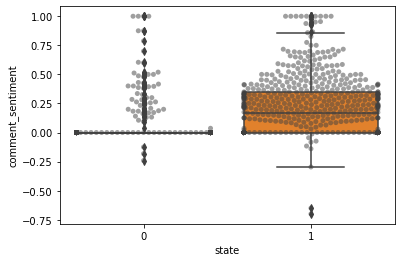

In [396]:
import seaborn as sns

sns.boxplot(x="state", y="comment_sentiment", data=data_text)
sns.swarmplot(x="state", y="comment_sentiment", data=data_text, color=".25", alpha=0.5)

#### success state has a higher positive sentiment from comments, around 0.2. 
#### Median Sentiment for failed state is 0 cos most of them does not have comment.

In [407]:
# look at why sentiment is extremely low for the success state
pd.set_option('display.max_colwidth', 500)
data_text[data_text["comment_sentiment"] < -0.5]["comments_clean"]

404                                                                                   Chris. over 5 years ago. So how's it coming?. Chris. over 5 years ago. "One is the loneliest number that you'll ever do. Two can be as bad as one. It's the loneliest number since the number one"
768     Corey DonnellCreator. over 5 years ago. Hello everyone. I'm am very sorry for the delay in getting all the drawings out. I want you all to know that I have not forgotten everyone and do not plan on not completing my work.. Ryan Spilken. about 6 years ago. Yeah boyeeeeeeee
Name: comments_clean, dtype: object

In [421]:
pd.reset_option('display.max_colwidth')

In [422]:
#Use affinn score (to detect emoji)
from afinn import Afinn
afinn = Afinn(emoticons=True)

In [423]:
afinn_scores = [afinn.score(text) for text in data_text.comments_clean]
data_text['comment_afinn'] = afinn_scores

In [424]:
data_text.head()

,story,state,title_blurb,comments_clean,faq_clean,comment_sentiment,comment_afinn
0,Producto Final\nHi! The funds we will used to ...,0,Save water 100% liquid downloads in toilets at...,No comments yet.,No faq,0.000000,-1.0
1,At Ormiston Primary School we are looking at c...,0,Ormiston Primary Community Garden.We at Ormist...,No comments yet.,No faq,0.000000,-1.0
2,Hello world :-] My name is Bryan. I have been ...,0,"Aspiring metalsmith in need of better tools, a...",No comments yet.,No faq,0.000000,-1.0
3,I'm tired of woman being overlooked and consid...,0,Beauty At Any Age.So many women believe they a...,No comments yet.,No faq,0.000000,-1.0
4,Table of Contents\n• TAPEWORM by Martin Rose\n...,0,Shrieks and Shivers from the Horror Zine.The H...,Paula Limbaugh. over 6 years ago. So sorry yo...,No faq,0.140625,2.0


In [425]:
data_text[data_text["comments_clean"] != " No comments yet."].loc[:,["comments_clean","comment_afinn"]].head(10)

,comments_clean,comment_afinn
4,Paula Limbaugh. over 6 years ago. So sorry yo...,2.0
6,finnibun. about 1 month ago. It's been an inc...,223.0
7,PageLessCreator. 7 months ago. PageLess just ...,4.0
8,Alexander DruninSuperbacker. 11 months ago. C...,8.0
10,Sole. about 6 years ago. Happy Birthday Jon! ...,11.0
11,BloodletSuperbacker. over 1 year ago. Have we...,28.0
18,Sherry Collins-Evans. about 8 years ago. WOW!...,50.0
19,Michael EmeryCreator. over 7 years ago. Thank...,24.0
21,liam jolley. about 1 year ago. Never mind I a...,-5.0
23,Terry Smith. over 7 years ago. Received my pa...,9.0


<AxesSubplot:xlabel='state', ylabel='comment_afinn'>

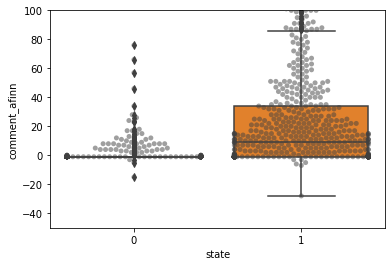

In [430]:
sns.boxplot(x="state", y="comment_afinn", data=data_text).set(ylim=(-50, 100))
sns.swarmplot(x="state", y="comment_afinn", data=data_text, color=".25", alpha=0.5)

### Create 2 new features on sentiment but ultimately choose one since most likely high correlation 

In [434]:
data_new = data

In [435]:
data_new["title_blurb"] = data_text["title_blurb"]
data_new["comments_clean"] = data_text["comments_clean"]
data_new["faq_clean"] = data_text["faq_clean"]
data_new["comment_sentiment"] = data_text["comment_sentiment"]
data_new["comment_afinn"] = data_text["comment_afinn"]

In [441]:
data_new.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'current_currency', 'deadline', 'fx_rate',
       'goal', 'id', 'launched_at', 'location', 'name', 'pledged', 'profile',
       'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type', 'story', 'faq', 'num_faq', 'comments', 'n_comments',
       'duration', 'title_blurb', 'comments_clean', 'faq_clean',
       'comment_sentiment', 'comment_afinn'],
      dtype='object')

In [443]:
data_new = data_new.drop(["blurb","name","faq","comments"], axis=1)

In [444]:
#Convert state to 0,1
data_new['state'] = data_new['state'].map(lambda x: 0 if x == 'failed' else 1)

In [448]:
pd.set_option('display.max_columns', None)
data_new.head()

,backers_count,category,converted_pledged_amount,country,created_at,current_currency,deadline,fx_rate,goal,id,launched_at,location,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,story,num_faq,n_comments,duration,title_blurb,comments_clean,faq_clean,comment_sentiment,comment_afinn
0,1,"{""id"":331,""name"":""3D Printing"",""slug"":""technol...",1,ES,2015-08-18 21:01,USD,2016-07-09 20:11,1.212886,15000,1662798399,2016-06-09 20:11,"{""id"":55897673,""name"":""Mexico"",""slug"":""mexico-...",1.0,"{""id"":2075449,""project_id"":2075449,""state"":""in...",save-water-100-liquid-downloads-in-toilets,https://www.kickstarter.com/discover/categorie...,False,False,0,2016-07-09 20:11,1.136930,"{""web"":{""project"":""https://www.kickstarter.com...",1.136930,domestic,Producto Final\nHi! The funds we will used to ...,0,0,30 days 00:00:00.000000000,Save water 100% liquid downloads in toilets at...,No comments yet.,No faq,0.000000,-1.0
1,2,"{""id"":309,""name"":""Farms"",""slug"":""food/farms"",""...",9,NZ,2015-08-11 18:04,USD,2015-09-11 15:55,0.723585,5000,1316288919,2015-08-12 15:55,"{""id"":22726370,""name"":""Flat Bush"",""slug"":""flat...",15.0,"{""id"":2063089,""project_id"":2063089,""state"":""in...",ormiston-primary-community-garden,https://www.kickstarter.com/discover/categorie...,False,False,0,2015-09-11 15:55,0.655304,"{""web"":{""project"":""https://www.kickstarter.com...",9.829555,domestic,At Ormiston Primary School we are looking at c...,0,0,30 days 00:00:00.000000000,Ormiston Primary Community Garden.We at Ormist...,No comments yet.,No faq,0.000000,-1.0
2,0,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",0,US,2015-04-28 21:14,USD,2015-05-28 21:14,1.000000,10000,818890122,2015-04-29 20:57,"{""id"":2428184,""name"":""Jackson"",""slug"":""jackson...",0.0,"{""id"":1869272,""project_id"":1869272,""state"":""in...",aspiring-metalsmith-in-need-of-better-tools-an...,https://www.kickstarter.com/discover/categorie...,False,False,0,2015-05-28 21:14,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic,Hello world :-] My name is Bryan. I have been ...,0,0,29 days 00:16:51.000000000,"Aspiring metalsmith in need of better tools, a...",No comments yet.,No faq,0.000000,-1.0
3,0,"{""id"":278,""name"":""People"",""slug"":""photography/...",0,US,2014-07-07 1:30,USD,2014-10-26 0:00,1.000000,2000,1934517401,2014-09-26 0:00,"{""id"":2357536,""name"":""Austin"",""slug"":""austin-t...",0.0,"{""id"":1103425,""project_id"":1103425,""state"":""in...",beauty-at-any-age,https://www.kickstarter.com/discover/categorie...,False,False,0,2014-10-26 0:00,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic,I'm tired of woman being overlooked and consid...,0,0,30 days 00:00:00.000000000,Beauty At Any Age.So many women believe they a...,No comments yet.,No faq,0.000000,-1.0
4,10,"{""id"":324,""name"":""Anthologies"",""slug"":""publish...",340,US,2014-11-04 16:30,USD,2014-12-09 9:20,1.000000,2500,1449353867,2014-11-09 9:20,"{""id"":2380358,""name"":""Cincinnati"",""slug"":""cinc...",340.0,"{""id"":1491788,""project_id"":1491788,""state"":""in...",shrieks-and-shivers-from-the-horror-zine,https://www.kickstarter.com/discover/categorie...,False,False,0,2014-12-09 9:20,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",340.000000,international,Table of Contents\n• TAPEWORM by Martin Rose\n...,0,1,30 days 00:00:00.000000000,Shrieks and Shivers from the Horror Zine.The H...,Paula Limbaugh. over 6 years ago. So sorry yo...,No faq,0.140625,2.0


In [449]:
data_new.to_csv (r'.\GitHub\BT4222_GrpProject\Output\TJ_dataset_sentiment.csv', index = False, header=True)